In [37]:
# importing modules
import numpy as np
import pandas as pd         # dataframe 용이

# umport python lib for visulization
import matplotlib.pyplot as plt
# 노트북 페이지에 바로 그래프 나오게 
%matplotlib inline    
import seaborn as sns
plt.style.use('seaborn')    # matplot의 기본 scheme 대신 seaborn scheme로 세팅 
sns.set(font_scale=2.5)     # seaborn의 font_scale 로 글씨 크기 통일

# import missingno as msno    # null값 확인에 용의
import warnings    # ignore warnings
warnings.filterwarnings('ignore')

In [38]:
# checking current working directory
import os
os.getcwd()

'C:\\Users\\USER\\Documents\\Github\\2019-1-winter-BOAZ\\PYTHON\\Untitled Folder'

In [140]:
# ../하위폴더명
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [108]:
sns.set()
# feature에 따른 생존여부 함수 정의
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, figsize=(10,5))

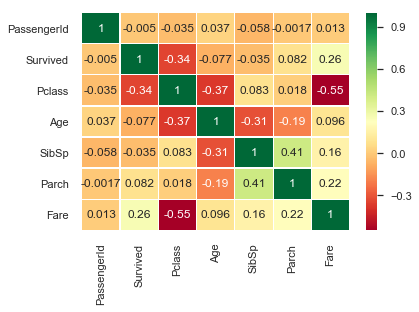

In [109]:
sns.heatmap(train.corr(), annot=True, cmap='RdYlGn', linewidth=0.2)
fig = plt.gcf()
fig.set_size_inches(6,4)
plt.show()

### FEATURE ENGINEERING

#### Name 

In [141]:
train_test_data = [train, test] # combining train and test dataset
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [142]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Sir           1
Don           1
Countess      1
Jonkheer      1
Capt          1
Lady          1
Name: Title, dtype: int64

In [133]:
pd.crosstab(train.Title, train.Sex).T.style.background_gradient(cmap='summer_r')

Title,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [143]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [144]:
pd.crosstab(train.Title, train.Survived).T.style.background_gradient(cmap='summer_r')

Title,0,1,2,3
Survived,,,,
0,436,55,26,32
1,81,127,99,35


In [153]:
# delete unnecessary feature from dataset
# drop - axis, inplace
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

#### Sex

In [145]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='summer_r')

- Pclass가 3인 남성, Pclass가 1인 여성

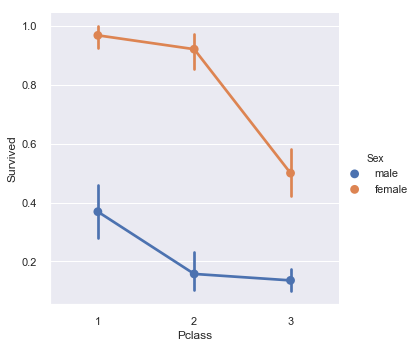

In [126]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train)
plt.show()

- %로 봤을 때의 그래프, Pclass Sex 모두 중요한 feature

In [146]:
sex_mapping={'male':0, 'female':1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

#### Age

In [147]:
train.groupby('Title')['Age'].mean()

Title
0    32.368090
1    21.773973
2    35.898148
3    20.430161
Name: Age, dtype: float64

In [148]:
# Title 평균 나이(소수 첫째자리 반올림) 로 missing Age 채우기
train.loc[(train.Age.isnull())&(train.Title==0), 'Age'] = 32
train.loc[(train.Age.isnull())&(train.Title==1), 'Age'] = 22
train.loc[(train.Age.isnull())&(train.Title==2), 'Age'] = 36
train.loc[(train.Age.isnull())&(train.Title==3), 'Age'] = 20

In [149]:
train.Age.isnull().value_counts()    # non null

False    891
Name: Age, dtype: int64

In [150]:
train.Age.describe()

count    891.000000
mean      29.761134
std       13.169698
min        0.420000
25%       22.000000
50%       30.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [210]:
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [211]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

In [154]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [156]:
pd.crosstab(train.Age, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Age,,,
0.0,45,55,100
1.0,161,99,260
2.0,220,116,336
3.0,111,69,180
4.0,12,3,15
All,549,342,891


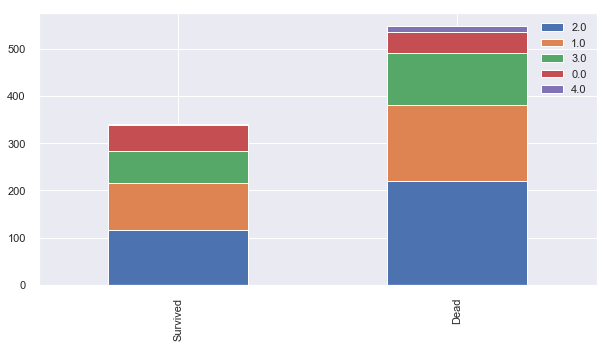

In [158]:
bar_chart('Age')

#### Embarked

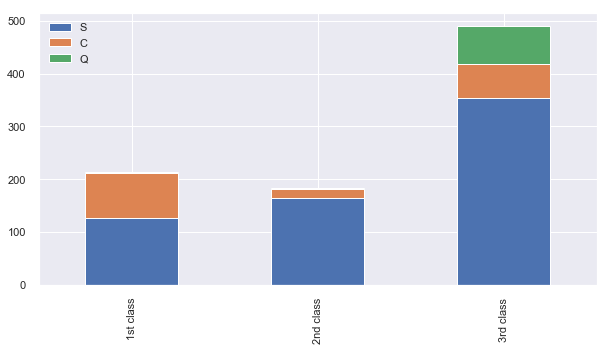

In [159]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [ ]:
- Q - 1등급에 거의 없다
- S - 모든 클래스의 50% 이상 -> embark가 missing인 경우 S로 써도 무방하다
more than 50% of 1st class are from S embark
more than 50% of 2nd class are from S embark
more than 50% of 3rd class are from S embark

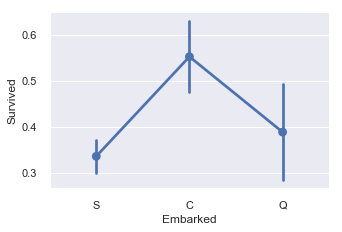

In [160]:
sns.factorplot('Embarked', 'Survived', data=train)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

- 1st에 C와 S 집중되어있는데 C에서 탑승한사람 생존 확률 50%이상

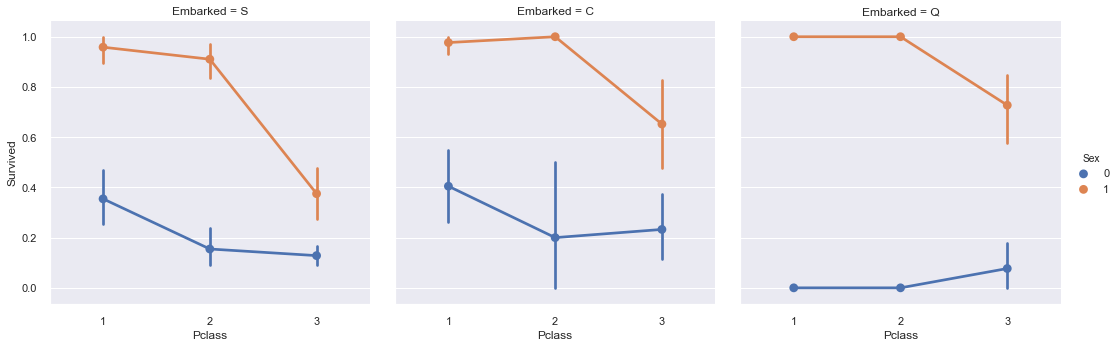

In [161]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col= 'Embarked', data=train)
plt.show()

- S + 3rd class 생존 확률 매우 낮음

In [162]:
train['Embarked'].fillna('S', inplace=True)

In [164]:
train.Embarked.isnull().value_counts()

False    891
Name: Embarked, dtype: int64

In [165]:
# convert to numeric
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

#### Fare

In [166]:
# fill missing Fare with median fare for each Pclass
# train.groupby('Pclass')
# transform()
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


(0.0, 512.3292)

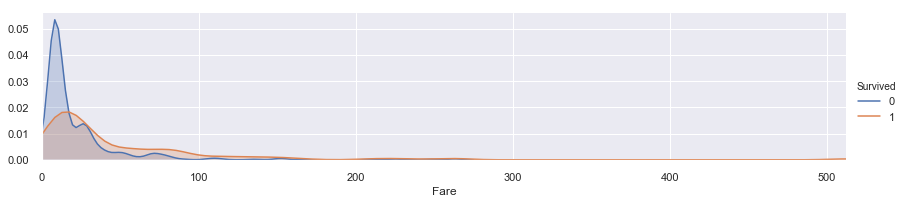

In [167]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim()

In [168]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [169]:
# Convert to numeric
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 8, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 31), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

In [170]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,3.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,3.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,1.0,NaN,0,0


In [ ]:
#### Cabin

In [171]:
train.Cabin.value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
C22 C26            3
D                  3
F2                 3
E101               3
F33                3
C93                2
C52                2
B5                 2
E25                2
D35                2
E121               2
C124               2
B22                2
E67                2
C83                2
D33                2
C2                 2
B58 B60            2
C68                2
E44                2
D20                2
D26                2
C126               2
D17                2
E8                 2
B57 B59 B63 B66    2
F4                 2
                  ..
A31                1
C82                1
D9                 1
D7                 1
C62 C64            1
A36                1
B101               1
B41                1
C118               1
B73                1
E34                1
C32                1
C54                1
D21                1
E77                1
D28                1
E68          

In [173]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

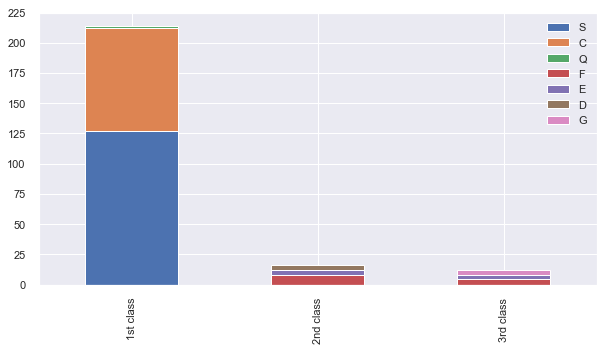

In [174]:
# Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [175]:
# feature scaling
# 남자 - 여자 차이 VS 10달러 - 20달러 차이
# 후자를 더 크게 반영하므로 
# 범위를 반영하여 소숫점으로  숫자지정
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [182]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [ ]:
#### FamilySize

In [176]:
# 배에 혼자 탔는지, 가족과 함께 탔는지가 중요하므로 하나의 변수로 만들자
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

(0, 11.0)

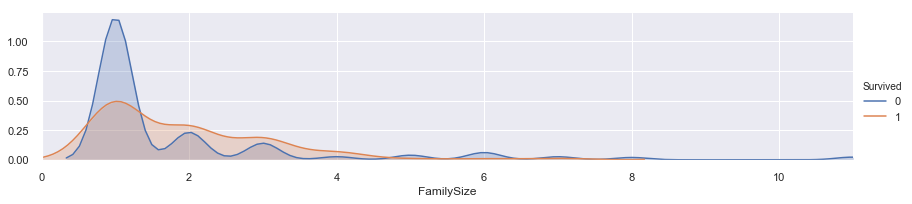

In [177]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [178]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [179]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train_data = train.drop(['PassengerId'], axis=1)

In [184]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [185]:
# 숫자로 구성된 feature 벡터 가지고 있으면 ML 가능
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,3.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,3.0,0.8,0,2,0.4
4,3,0,2.0,1.0,2.0,0,0,0.0


In [ ]:
# Modeling

In [186]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(4)
memory usage: 55.8 KB


In [190]:
#importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [191]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [192]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.76404494 0.83146067 0.79775281 0.84269663 0.80898876
 0.83146067 0.82022472 0.84269663 0.84269663]


In [193]:
# kNN Score
round(np.mean(score)*100, 2)

82.15

In [194]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.8        0.79775281 0.82022472 0.76404494 0.86516854 0.76404494
 0.85393258 0.82022472 0.75280899 0.79775281]


In [195]:
# decision tree Score
round(np.mean(score)*100, 2)

80.36

In [ ]:
xyz=[]
accuracy=[]
std=[]
classifiers = ['Linear Svm', 'Radial Svm', 'Logistic Regression', 'kNN', 'Decision Tree',
              'Naive Bayes', 'Random Forest']
models = []

In [196]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.81111111 0.83146067 0.83146067 0.76404494 0.86516854 0.79775281
 0.84269663 0.82022472 0.7752809  0.83146067]


In [197]:
# Random Forest Score
round(np.mean(score)*100, 2)

81.71

In [198]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.84444444 0.74157303 0.73033708 0.75280899 0.71910112 0.80898876
 0.75280899 0.78651685 0.83146067 0.84269663]


In [199]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

78.11

In [200]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.83333333 0.7752809  0.80898876 0.82022472 0.84269663 0.82022472
 0.83146067 0.85393258 0.83146067 0.85393258]


In [201]:
round(np.mean(score)*100,2)

82.72

In [204]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,3.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,3.0,0.8,0,2,0.4
4,0,3,0,2.0,1.0,2.0,0,0,0.0


In [212]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [213]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
Fare          0
Cabin         0
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [214]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

In [215]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
